<a href="https://colab.research.google.com/github/Girra02/PDS/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Convert data into a DataFrame
df = pd.read_csv("/Frailty_dataset.csv")

In [31]:
# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

Missing values before cleaning:
 Height           0
Weight           0
Age              0
Grip strength    0
Frailty          0
dtype: int64


In [32]:
# Convert categorical 'Frailty' to binary (0 = No, 1 = Yes)
df["Frailty"] = df["Frailty"].map({"N": 0, "Y": 1})
correlation_matrix = df.corr()
print("Correlation matrix:\n", correlation_matrix)


Correlation matrix:
                 Height    Weight       Age   Grip strength   Frailty
Height         1.000000  0.571525 -0.032580      -0.167682  0.042321
Weight         0.571525  1.000000  0.190926       0.032807  0.479036
Age           -0.032580  0.190926  1.000000       0.133756 -0.106504
Grip strength -0.167682  0.032807  0.133756       1.000000 -0.427810
Frailty        0.042321  0.479036 -0.106504      -0.427810  1.000000


In [33]:
descriptive_stats = df.describe()
print("Descriptive statistics:\n", descriptive_stats)


Descriptive statistics:
          Height      Weight        Age   Grip strength   Frailty
count  10.000000   10.000000  10.000000      10.000000  9.000000
mean   68.600000  131.900000  32.500000      26.000000  0.444444
std     1.670662   14.231811  12.860361       4.521553  0.527046
min    65.800000  112.000000  17.000000      19.000000  0.000000
25%    67.825000  120.750000  22.250000      22.500000  0.000000
50%    68.450000  136.000000  29.500000      27.000000  0.000000
75%    69.700000  141.750000  43.500000      29.750000  1.000000
max    71.500000  153.000000  51.000000      31.000000  1.000000


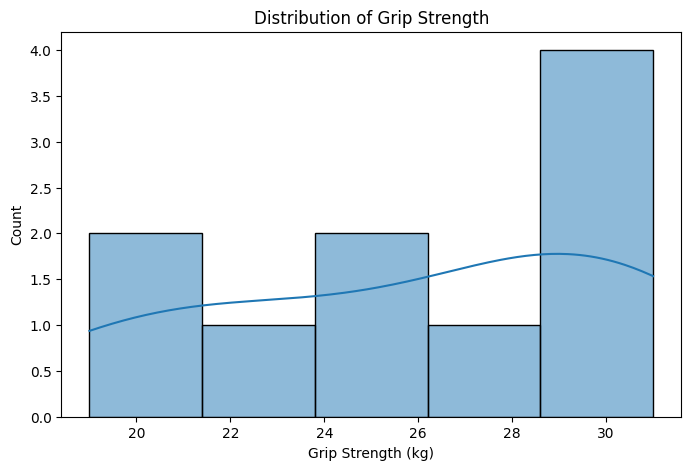

In [35]:
# 1. Histogram of Grip Strength
plt.figure(figsize=(8,5))
sns.histplot(df["Grip strength"], bins=5, kde=True)
plt.title("Distribution of Grip Strength")
plt.xlabel("Grip Strength (kg)")
plt.ylabel("Count")
plt.savefig("/content/histogram_grip_strength.png")
plt.show()

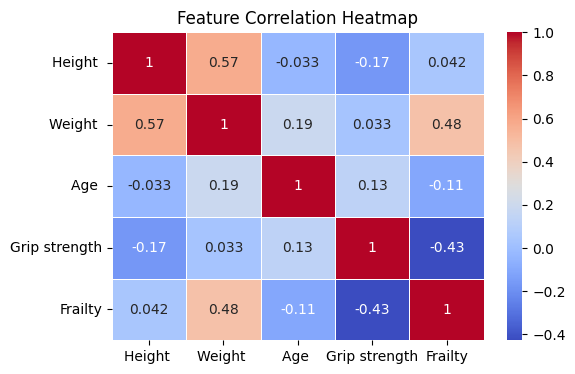

In [36]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("/content/heatmap_correlation.png")
plt.show()

**Question 2**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/StudentsPerformance.csv")

In [4]:
print("Missing values before cleaning:\n", df.isnull().sum())
df_cleaned = df.dropna()

Missing values before cleaning:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [5]:
cleaned_path = "/content/student_performance_cleaned.csv"
df_cleaned.to_csv(cleaned_path, index=False)

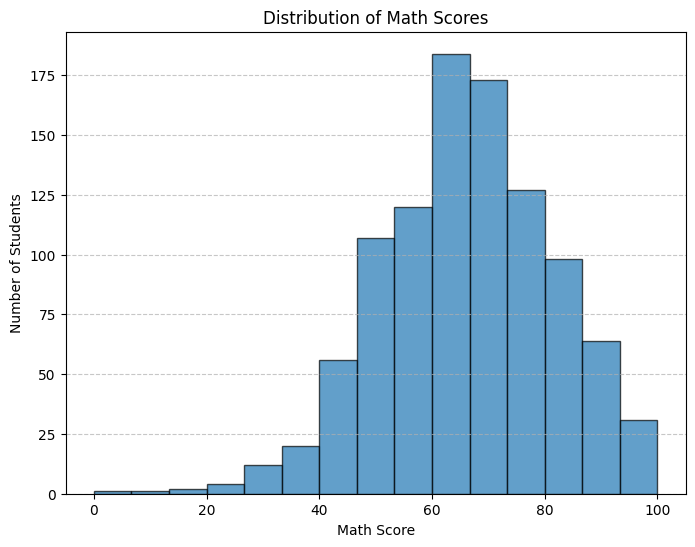

In [27]:
# Visualization 1: Distribution of Math Scores
plt.figure(figsize=(8, 6))
plt.hist(df['math score'], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.title("Distribution of Math Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

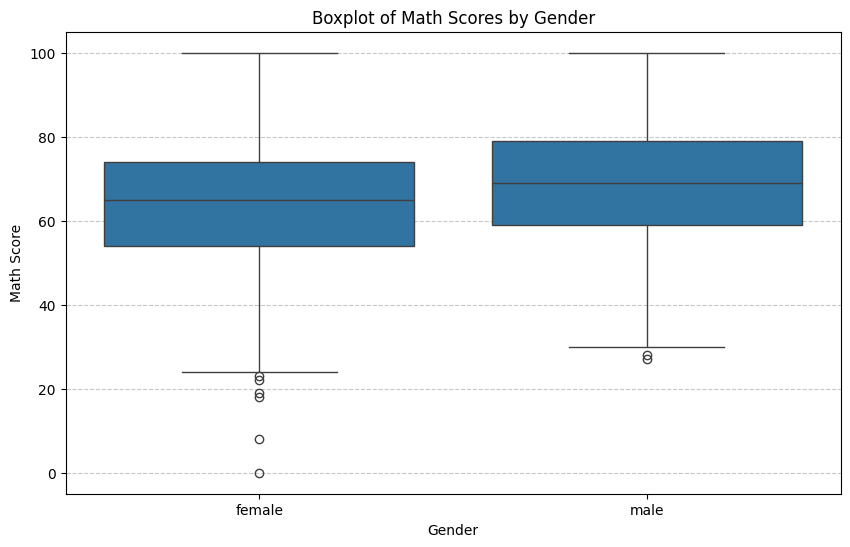

In [28]:
# Visualization 2: Boxplot of Scores by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='math score')
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.title("Boxplot of Math Scores by Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

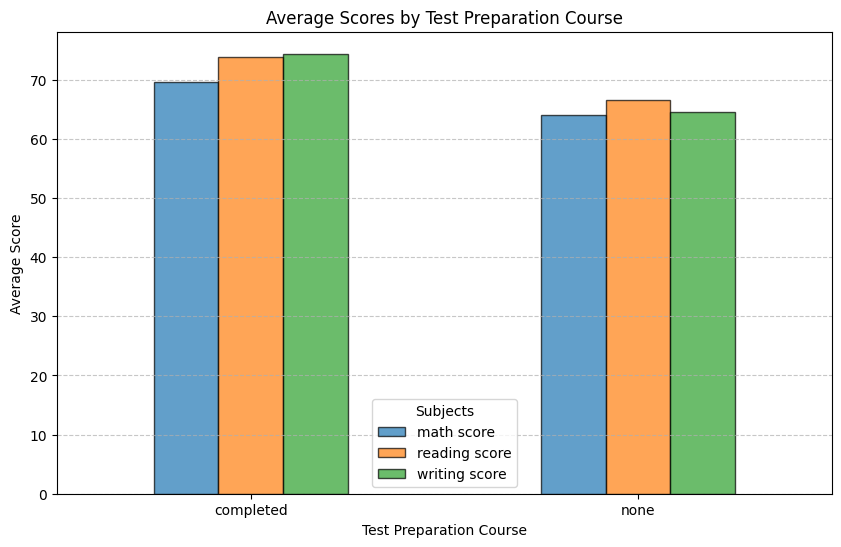

In [24]:
# Visualization 3: Average Scores by Test Preparation Course
avg_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

# Plot the average scores
avg_scores.plot(kind='bar', figsize=(10, 6), edgecolor='black', alpha=0.7)
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.title("Average Scores by Test Preparation Course")
plt.xticks(rotation=0)
plt.legend(title="Subjects")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

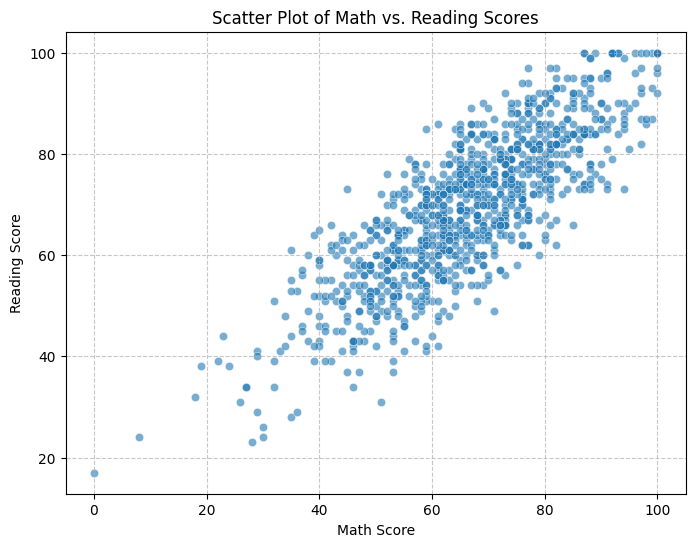

In [25]:
# Visualization 4: Scatter Plot of Math vs. Reading Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='math score', y='reading score', alpha=0.6)
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.title("Scatter Plot of Math vs. Reading Scores")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

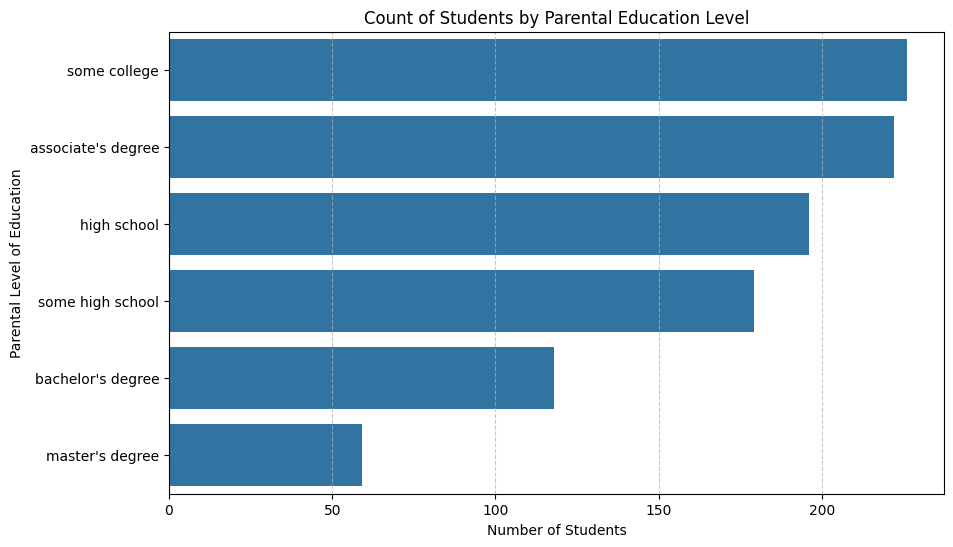

In [26]:
# Visualization 5: Count Plot of Parental Education Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='parental level of education',
              order=df['parental level of education'].value_counts().index)
plt.xlabel("Number of Students")
plt.ylabel("Parental Level of Education")
plt.title("Count of Students by Parental Education Level")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()